#第十二週上課內容

###GitHub 教材參考資料

[https://github.com/htchen/i2p-nthu/tree/master/程式設計一/Arrays](https://github.com/htchen/i2p-nthu/blob/master/%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E4%B8%80/array/array.md)


[https://github.com/htchen/i2p-nthu/tree/master/程式設計一/Pointers](https://github.com/htchen/i2p-nthu/blob/master/%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E4%B8%80/pointer/Pointer.md)


##Example 1
###**指標變數**

####使用 `&` 符號取得位址

指標 (pointer) 是 C 語言裡面的非常重要、同時也最讓初學者感到困擾的概念。如果用最簡單的方式來說明，指標就是一個專門用來儲存位址的變數。

我們在使用 `scanf()` 的時候，其實就已經用過位址來當作參數 (變數前面加 `&`)。而任何 C 的 function 如果不想靠 `return` 方式來傳回值，就只能透過位址來取得 function 執行的結果。我們先來探討一下 `&` 符號，以及如何取得位 址的資訊。在變數前面加上 `&`，會得到用來儲存該變數的位址。譬如變數的名稱叫做 `y`，則 `&y` 就是這個變數的位址。 我們可以把位址想成記憶體中的某個位置。

輸出的 `&y` 就是位址的十六進位值。能夠取得變數的位址是一個很強大的功能，因為這樣一來我們就可以透過位址來存取和修改變數值，而不再只是透過變數名稱來存取變數值。除此之外，我們也可以把位址當參數傳遞，這一點可以 幫我們做到很多原本做不到的事情。

In [58]:
%%writefile E12_01.c

#include <stdio.h>
int main(void)
{
  int y = 5;
  double z = 1.2;
  char c = 'A';
 
  printf("The value of y is %d; the address of y is %p.\n", y, &y); 
  printf("The size of y is %lu bytes; the size of &y is %lu bytes.\n", 
         sizeof(y), sizeof(&y)); 

  printf("The value of z is %5.2f; the address of z is %p.\n", z, &z); 
  printf("The size of z is %lu bytes; the size of &z is %lu bytes.\n", 
         sizeof(z), sizeof(&z)); 

  printf("The value of c is %c; the address of c is %p.\n", c, &c); 
  printf("The size of c is %lu bytes; the size of &c is %lu bytes.\n", 
         sizeof(c), sizeof(&c)); 

  return 0;
}

Overwriting E12_01.c


In [59]:
%%shell
gcc E12_01.c -o E12_01
./E12_01

The value of y is 5; the address of y is 0x7fff21b4904c.
The size of y is 4 bytes; the size of &y is 8 bytes.
The value of z is  1.20; the address of z is 0x7fff21b49050.
The size of z is 8 bytes; the size of &z is 8 bytes.
The value of c is A; the address of c is 0x7fff21b4904b.
The size of c is 1 bytes; the size of &c is 8 bytes.


##Example 2
我們之前提過每個 function 會有自己的 local variables，不會和外部衝突，而且參數傳入 function 的時候，是把值 複製過去，所以在 function 裡任意修改參數並不會影響到外部的變數。下面的範例就是在說明這個特性。

觀察執行結果會發現使用什麼樣的變數名稱在 `main()` 和 `f()` 其實完全無關，而且每個變數的位址也都不一樣。所以 真正能用來區別不同的資料的其實是位址。

In [60]:
%%writefile E12_02.c
#include <stdio.h>

void f(int);
int main(void)
{
  int y = 2, z = 5;
  printf("In %s(), y = %d and &y = %p\n", __func__, y, &y);
  printf("In %s(), z = %d and &z = %p\n", __func__, z, &z);
  f(y); 
  return 0;
}

void f(int z)
{
  int y = 10;
  printf("In %s(), y = %d and &y = %p\n", __func__, y, &y); 
  printf("In %s(), z = %d and &z = %p\n", __func__, z, &z);
}

Overwriting E12_02.c


In [61]:
%%shell
gcc E12_02.c -o E12_02
./E12_02


In main(), y = 2 and &y = 0x7fff5103d490
In main(), z = 5 and &z = 0x7fff5103d494
In f(), y = 10 and &y = 0x7fff5103d474
In f(), z = 2 and &z = 0x7fff5103d46c


##Example 3
假設我們想要寫一個 function，傳入兩個參數，然後在 function 裡面交換這兩個參數的值，這個程式該怎麼寫呢? 先看看下面這種寫法:



In [62]:
%%writefile E12_03.c
#include <stdio.h>
void swap(int u, int v);
int main(void)
{
  int y = 2, z = 5;
  printf("Before calling swap(), y = %d and z = %d.\n", y, z); 
  swap(y, z);
  printf("After calling swap(), y = %d and z = %d.\n", y, z); 
  return 0;
}
       
void swap(int u, int v) 
{
  int tmp;
  printf("In %s(), before swapping, u = %d and v = %d.\n", __func__, u, v); 
  tmp = u;
  u = v;
  v = tmp;
  printf("In %s(), after swapping, u = %d and v = %d.\n", __func__, u, v);
}


Overwriting E12_03.c


In [63]:
%%shell
gcc E12_03.c -o E12_03
./E12_03

Before calling swap(), y = 2 and z = 5.
In swap(), before swapping, u = 2 and v = 5.
In swap(), after swapping, u = 5 and v = 2.
After calling swap(), y = 2 and z = 5.


上面的結果是 `swap()` 對 `main()` 裡的 `y` 和 `z` 一點效果都沒有。雖然在 `swap()` 裡面，做完下面三行之後 
```
  tmp = u;
  u = v;
  v = tmp;
```
參數確實被交換了，但是跳出了 `swap()` 回到 `main()`，一切都沒變，因為更改的其實是存放在不同位址的變數值。

##Example 4

###**指標變數**
用來記錄記憶體位址的變數。

要怎麼才能做到真正把 `main()` 裡的 `y` 和 `z` 交換? 我們要先學會怎麼使用指標變數。

假設我們已經有一個指標變數，名字叫做 `ptr`，由於指標變數專門用來儲存位址，所以我們可以寫 
```
  ptr = &y;
```
這樣的動作等於把 `y` 的位址用 `ptr` 記下來，通常我們也會把這樣的動作叫做 把 `ptr` 指向 `y`。

雖然同樣都代表某個記憶體位址，但是 `&y` 是一個 constant，它的值就是 `y` 的位址，是個固定的值不能改變。但是 `ptr` 是個變數，所以我們可以改變 `ptr` 的值，拿它來記錄別的位址，例如，
```
  ptr = &z;
```
假設我們用了上面的程式碼把 `ptr` 的值改設為 `z` 的位址，也就說用 `ptr` 記錄下 `z` 的位址，那麼我們可以對 `ptr` 做所謂 *dereferencing* 的操作，這個操作的作用是把 `ptr` 記錄的位址裡面所儲存的值取出來，例如 
```
  x = *ptr;
```
也就是使用 `*` 符號加在指標變數前面，可以取得 `ptr` 代表的位址裡所存放的數值。這兩個動作 `ptr = &z;` 和 `x = *ptr;` 得到的效果相當於
```
  x = z;
```

###**如何宣告指標變數**

我們知道如何宣告 `int` 變數或是其他型別的變數，但是要怎麼宣告指標變數?難道是用底下這樣:
```
  pointer ptr; /* not the way to declare a pointer */
```
並不是這樣，並沒有叫做 `pointer` 的內建型別。而且我們除了要知道 `ptr` 是個用來記錄位址的變數之外，還要知道它所記錄的位址裡，儲存的資料型別是什麼，因為不同型別的資料在記憶體裡面需要的空間不同，而我們除了要靠
`ptr` 記錄起始位址之外，還要知道後面涵蓋了多少數量的記憶體空間。所以我們必須有各式各樣的指標類型，類似
```
  int_pointer ptr; /* not the way to declare a pointer */   
  char_pointer ptr; /* not the way to declare a pointer */   
  float_pointer ptr; /* not the way to declare a pointer */
```
不過如果真的是這樣宣告就太麻煩了，因為每個原有的型別都要造出一個對應的指標型別。在 C 語言裡真正的作法是底下這樣的寫法
```
  int * pi; /* pi is a pointer to an integer variable */ 
  char * pc; /* pc is a pointer to a character variable */ 
  float * pf, * pg; /* pf and pg are pointers to float variables */
```
這樣的宣告表示 `pi` 是指向 `int` 的指標，所以 `pi` 的值是個位址，而這個位址裡存的資料是個整數。同理，`pc` 是指向 `char` 的指標，`pf` 和 `pg` 都是指向 `float` 的指標。

前面舉的「每個原有的型別都要造出一個對應的指標型別」的情況，如果真的要這麼做，可以用 `typedef` 來達成（但實際上沒什麼必要這麼做）：
```
typedef int * int_pointer;
typedef char * char_pointer;
typedef float * float_pointer;
```
我們用底下的圖來模擬一下指標的宣告和使用過程中記憶體的狀態 變化:

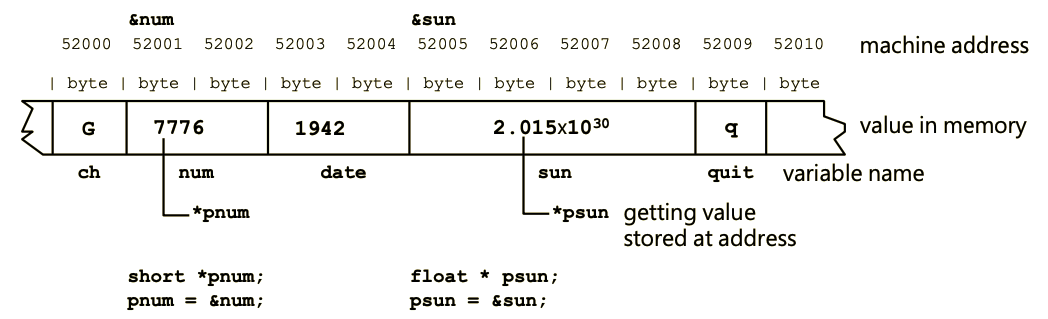

當我們在寫程式的時候，每個變數對我們來說具有兩項主要性質: 變數名稱和變數值。

當程式經過 compile 然後 load 到記憶體裡準備執行時，電腦認知的變數所具有的性質變成位址和變數值。也就是說電腦是以位址來區別變數。 

在許多語言中，位址完全交給電腦負責就好了，但是在 C 語言裡，程式設計者可以用 `&` 符號來取得位址的資訊。我 們就來試試看透過記憶體位址，達到真正交換兩個變數值的效果。

In [78]:
%%writefile E12_04.c
#include <stdio.h>
void swap(int * u, int * v);
int main(void)
{
  int y = 2, z = 5;
  printf("Before calling swap(), y = %d and z = %d.\n", y, z); 
  swap(&y, &z);
  printf("After calling swap(), y = %d and z = %d.\n", y, z); 
  return 0;
}
       
void swap(int * u, int * v)  // u = &y; v = &z;
{
  int tmp;
  printf("In %s(), before swapping, u = %d and v = %d.\n", __func__, *u, *v);
  tmp = *u;
  *u = *v;
  *v = tmp;
  printf("In %s(), after swapping, u = %d and v = %d.\n", __func__, *u, *v);
}

Overwriting E12_04.c


In [79]:
%%shell
gcc E12_04.c -o E12_04
./E12_04

Before calling swap(), y = 2 and z = 5.
In swap(), before swapping, u = 2 and v = 5.
In swap(), after swapping, u = 5 and v = 2.
After calling swap(), y = 5 and z = 2.



上面的執行結果，確實把 `main()` 裡的 `y` 和 `z` 的值對調了。在主程式裡呼叫 `swap()` 的方式變成
```
  swap(&y, &z);
```
我們傳入的參數不再是 `y` 和 `z` 的值，而是 `y` 和 `z` 的位址。所以在宣告 `swap()` 的 prototype 的時候，參數的型別應該是指標，這樣才能接收位址。而且因為 `y` 和 `z` 是 `int`，所以我們需要指向 `int` 的指標，
```
void swap(int * u, int * v);
```
在 `swap()` 的程式碼主體裡，我們宣告 `int tmp;` 因為要用 `tmp` 當作交換時的暫存區。由於 `u` 和 `v` 都是指標變數，
它們的值都代表著位址，我們要先把 `u` 所記錄的位址裡儲存的資料值取出來，放入 `tmp` 裡 
```
  tmp = *u;
```
(注意，絕對不要寫成 `tmp = u;`，我們要交換的是位址裡儲存的資料，不是要交換位址。) 

同樣的道理
```
  *u = *v;
```
把儲存在 `v` 所記錄的位址裡的資料取出來，把 `u` 所記錄的位址裡面儲存的值蓋掉。

如果能把這個範例想清楚，並且把整個寫法弄得很熟，指標的使用對我們來說就不會構成太大的困擾。最好不僅只是把原理都想通，還能熟練到可以反射式地寫出 `tmp = *u;` 或 `*u=*v;` 或 `int * u;` 這些指標的用法。建議大
家可以試著先把整個範例弄懂，然後自己重寫整個範例。

##Example 5


In [29]:
%%writefile E12_05.c
#include <stdio.h>
#define MAXN 1000000

int space[MAXN];

int f1(int x) 
{
  x = x + 1;
  return x;
}

void f2(unsigned int index)
{
  space[index] = space[index] + 1; 
}

int main()
{
  int x = 100; // space[12345]
  int y = 500; // space[67890]
  unsigned int px;
  unsigned int py;
   
  x = f1(x);
  printf("%d\n", x);
  f1(x);
  printf("%d\n", x);

  px = 12345;
  space[px] = x;
  f2(px);
  x = space[px];
 
  py = 67890;
  space[py] = y;
  f2(py);
  y = space[py];
  printf("%d %d\n", x, y);
 
  return 0;
}

Overwriting E12_05.c


In [30]:
%%shell
gcc E12_05.c -o E12_05
./E12_05

101
101
102 501


# Exercise 1

改寫上面的例子，變成用指標變數來實現。

In [80]:
%%writefile W12_01.c
#include <stdio.h>

void f2(int * q)
{
  *q = *q + 1;
}

int main()
{
  int x = 100;
  int y = 500;
  int * px;
  int * py;
   
  px = &x;
  f2(px);
  
  py = &y;
  f2(py);

  printf("%d %d\n", x, y);
 
  return 0;
}

Overwriting W12_01.c


In [81]:
%%shell
gcc W12_01.c -o W12_01
./W12_01

101 501


# Example 6

## 等價的寫法
`a[i]`  ⟺ `*(a+i)`

`&a[i]`  ⟺ `(a+i)`

In [86]:
%%writefile E12_06.c

#include <stdio.h>

int main(void)
{
  int a[10] = {1, 2}; // a 陣列名字, 被寫在程式碼裡的時候，會被替換成那個陣列開頭的記憶體位址
  int *p;
  a[5] = 100;  //1, 2,   0,   0,  0,  100,  0,  0,  0,  0
 
  printf("%lu\n", sizeof(a));
  printf("%p\n", a);
  printf("%3d %p\n", a[0], &a[0]);
  printf("%3d %p\n", a[1], &a[1]);
  printf("%3d %p\n", a[5], &a[5]);
 
  p  = a;
  printf("%p %p\n", a, p);
  printf("%p %p\n", &a[0], p+0);
  printf("%p %p\n", &a[1], p+1);
  printf("%p %p\n", &a[5], p+5);

  printf("%3d %3d\n", a[0], *(p+0));
  printf("%3d %3d\n", a[1], *(p+1));
  printf("%3d %3d\n", a[5], *(p+5));


  printf("%3d %3d\n", p[1], *(a+1));
  printf("%3d %3d\n", p[1], *(1+a));
  printf("%3d %3d\n", p[1], 1[a]);
  printf("%3d %3d\n", 1[p], 1[a]);
 
  int i = 5;
  printf("%3d %3d\n", i[p], i[a]);
  printf("%3d %3d\n", p[i], a[i]);


  return 0;
}

Overwriting E12_06.c


In [85]:
%%shell
gcc E12_06.c -o E12_06
./E12_06

40
0x7ffe7d90e690
  1 0x7ffe7d90e690
  2 0x7ffe7d90e694
100 0x7ffe7d90e6a4
0x7ffe7d90e690 0x7ffe7d90e690
0x7ffe7d90e690 0x7ffe7d90e690
0x7ffe7d90e694 0x7ffe7d90e694
0x7ffe7d90e6a4 0x7ffe7d90e6a4
  1   1
  2   2
100 100
  2   2
  2   2
  2   2
  2   2
100 100


# Example 7

「傳遞」陣列到函數裡？

指標變數和陣列的差別？

In [49]:
%%writefile E12_07.c
#include <stdio.h>

int f(int *p, int n)
{
  int i;
  int sum = 0;
  for (i=0; i<n; ++i) {
    sum = sum + p[i];
  }
  return sum;
}

/*
int f(int *p, int n)
{
  int i;
  int sum = 0;
  for (i=0; i<n; ++i, ++p) {
    sum = sum + *p;
  }
  return sum;
}
*/

/*
int g(int *p, int *end)
{
  int sum = 0;
  while (p < end)) {
    sum = sum + *p;
    ++p;
  }
  return sum;
}
*/

int main(void)
{
  int a[10] = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10};
  printf("%d\n", f(a, 10));
  //printf("%d\n", g(a, a+10));

  return 0;
}

Overwriting E12_07.c


In [48]:
%%shell
gcc E12_07.c -o E12_07
./E12_07

55


# Exercise 2

自己寫一個可以計算字串長度的函數
```
  unsigned long mylen(char *str);
```

In [50]:
%%writefile W12_02.c
#include <stdio.h>

unsigned long mylen(char *str);

int main(void)
{
  char str[] = "Hello, world!";
  printf("%lu, %s\n", mylen(str), str);
 
  return 0;
}

unsigned long mylen(char *p)
{
  ???
}


Writing W12_02.c


In [ ]:
%%shell
gcc W12_02.c -o W12_02
./W12_02